In [1]:
import numpy as np # linear algebra
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("AP_data.csv")

In [3]:
df_rainfall = pd.read_csv("Rainfall_data.csv")

In [4]:
df.head()

,Sl no,Date,Farmer No,Macro/ Micro nutrient,Farmer Name,District,Mandal,Village,Latitude,Longitude,...,Exch-K,Avail-Ca,Avail-Mg,Avail-S,Avail-Zn,Avail-B,Avail-Fe,Avail-Cu,Avail-Mn,Time
0,1,01-01-2015,1910,RK2276,P.Krishna Naik,Anantapur,Penukonda,Gonipeta,14.08,77.69,...,41,587,101,5.16,0.30,0.17,8.89,0.51,15.24,01-01-2015
1,2,01-01-2015,1911,RK2277,Kallu Thippe Naik,Anantapur,Penukonda,Gonipeta,14.09,77.69,...,102,811,261,9.91,0.36,0.57,3.24,0.44,6.90,01-01-2015
2,3,01-01-2015,1912,RK2278,P.Duble Bai,Anantapur,Penukonda,Gonipeta,14.09,77.69,...,46,582,48,3.77,0.37,0.19,5.54,0.42,8.34,01-01-2015
3,4,01-01-2015,1913,RK2279,H.Marekka (Kamma),Anantapur,Penukonda,Gonipeta,14.10,77.70,...,35,3048,52,4.14,0.23,0.21,1.79,0.67,4.17,01-01-2015
4,5,01-01-2015,1914,RK2280,M.Alevelamma,Anantapur,Penukonda,Gonipeta,14.09,77.69,...,76,511,84,1.45,0.36,0.22,22.26,0.45,9.20,01-01-2015


In [11]:
df_rainfall.head()

,Dist Code,Year,State Code,State Name,Dist Name,JANUARY NORMAL RAINFALL (Millimeters),FEBRUARY NORMAL RAINFALL (Millimeters),MARCH NORMAL RAINFALL (Millimeters),APRIL NORMAL RAINFALL (Millimeters),MAY NORMAL RAINFALL (Millimeters),JUNE NORMAL RAINFALL (Millimeters),JULY NORMAL RAINFALL (Millimeters),AUGUST NORMAL RAINFALL (Millimeters),SEPTEMBER NORMAL RAINFALL (Millimeters),OCTOBER NORMAL RAINFALL (Millimeters),NOVEMBER NORMAL RAINFALL (Millimeters),DECEMBER NORMAL RAINFALL (Millimeters),ANNUAL NORMAL RAINFALL (Millimeters)
0,1,Average 30 years,14,Chhattisgarh,Durg,16,27,19,19,21,200,340,344,212,61,14,4,1277
1,2,Average 30 years,14,Chhattisgarh,Bastar,5,15,17,51,66,212,398,381,246,116,24,4,1535
2,3,Average 30 years,14,Chhattisgarh,Raipur,12,20,23,15,17,194,392,394,249,62,8,2,1388
3,4,Average 30 years,14,Chhattisgarh,Bilaspur,17,30,22,17,18,191,381,387,194,52,13,5,1327
4,5,Average 30 years,14,Chhattisgarh,Raigarh,18,16,21,8,14,168,475,508,341,57,1,1,1628


In [13]:
# Merge the DataFrames using left_on and right_on
merged_df = pd.merge(df, df_rainfall, left_on='District', right_on='Dist Name', how='left')

In [14]:
merged_df.head()

,Sl no,Date,Farmer No,Macro/ Micro nutrient,Farmer Name,District,Mandal,Village,Latitude,Longitude,...,APRIL NORMAL RAINFALL (Millimeters),MAY NORMAL RAINFALL (Millimeters),JUNE NORMAL RAINFALL (Millimeters),JULY NORMAL RAINFALL (Millimeters),AUGUST NORMAL RAINFALL (Millimeters),SEPTEMBER NORMAL RAINFALL (Millimeters),OCTOBER NORMAL RAINFALL (Millimeters),NOVEMBER NORMAL RAINFALL (Millimeters),DECEMBER NORMAL RAINFALL (Millimeters),ANNUAL NORMAL RAINFALL (Millimeters)
0,1,01-01-2015,1910,RK2276,P.Krishna Naik,Anantapur,Penukonda,Gonipeta,14.08,77.69,...,16,57,41,38,71,122,92,41,7,497
1,2,01-01-2015,1911,RK2277,Kallu Thippe Naik,Anantapur,Penukonda,Gonipeta,14.09,77.69,...,16,57,41,38,71,122,92,41,7,497
2,3,01-01-2015,1912,RK2278,P.Duble Bai,Anantapur,Penukonda,Gonipeta,14.09,77.69,...,16,57,41,38,71,122,92,41,7,497
3,4,01-01-2015,1913,RK2279,H.Marekka (Kamma),Anantapur,Penukonda,Gonipeta,14.10,77.70,...,16,57,41,38,71,122,92,41,7,497
4,5,01-01-2015,1914,RK2280,M.Alevelamma,Anantapur,Penukonda,Gonipeta,14.09,77.69,...,16,57,41,38,71,122,92,41,7,497


In [5]:
df.shape

(4815, 29)

In [6]:
df.describe()

,Sl no,Latitude,Longitude,pH,EC,Avail-P,Exch-K,Avail-Ca,Avail-Mg,Avail-Zn,Avail-Fe,Avail-Cu,Avail-Mn
count,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000
mean,208.065213,15.932941,80.482434,7.477844,0.489531,16.704285,159.676012,2416.086604,522.878920,1.111973,28.349657,2.533325,18.805155
std,129.350032,1.737067,2.046098,1.052134,1.045581,18.810818,135.616280,2155.234533,473.764527,1.396243,38.578050,3.061383,18.965475
min,1.000000,12.810000,75.280000,4.150000,0.010000,0.450000,12.000000,20.000000,2.000000,0.030000,0.040000,0.030000,0.010000
25%,98.000000,14.520000,78.820000,6.740000,0.110000,5.160000,82.000000,839.000000,184.000000,0.410000,5.780000,0.930000,8.100000
50%,196.000000,15.550000,80.080000,7.810000,0.220000,10.930000,129.000000,1652.000000,374.000000,0.700000,12.210000,1.460000,12.960000
75%,307.000000,17.680000,82.420000,8.270000,0.510000,21.410000,196.000000,3150.500000,715.500000,1.250000,33.980000,2.600000,22.125000
max,499.000000,18.800000,84.190000,9.890000,27.500000,361.940000,2409.000000,13304.000000,5363.000000,23.920000,354.700000,20.180000,256.880000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl no                  4815 non-null   int64  
 1   Date                   4815 non-null   object 
 2   Farmer No              4815 non-null   object 
 3   Macro/ Micro nutrient  4815 non-null   object 
 4   Farmer Name            4814 non-null   object 
 5   District               4815 non-null   object 
 6   Mandal                 4815 non-null   object 
 7   Village                4815 non-null   object 
 8   Latitude               4815 non-null   float64
 9   Longitude              4815 non-null   float64
 10  Survey No.             4456 non-null   object 
 11  Soil type              4749 non-null   object 
 12  Fathers Name           400 non-null    object 
 13  Extent
(AC)            4338 non-null   object 
 14  Crop before            4595 non-null   object 
 15  pH  

In [8]:
for col in df.columns:
    print(col, df[col].nunique(),df[col].unique()[0:20],'\n')

Sl no 499 [ 1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] 

Date 1 ['01-01-2015'] 

Farmer No 4813 ['1910' '1911' '1912' '1913' '1914' '1916' '1917' '1918' '1919' '1920'
 '1921' '1922' '1923' '1924' '1925' '1927' '1928' '1929' '1930' '1931'] 

Macro/ Micro nutrient 4815 ['RK2276' 'RK2277' 'RK2278' 'RK2279' 'RK2280' 'RK2282' 'RK2283' 'RK2284'
 'RK2285' 'RK2286' 'RK2287' 'RK2288' 'RK2289' 'RK2290' 'RK2291' 'RK2292'
 'RK2293' 'RK2294' 'RK2295' 'RK2296'] 

Farmer Name 4660 ['P.Krishna Naik' 'Kallu Thippe Naik' 'P.Duble Bai' 'H.Marekka (Kamma)'
 'M.Alevelamma' 'K.Kadiramma' 'G.Narayanappa' 'A.Vijaya Kumar'
 'I.Anjanappa' 'Golla Jayamma' 'B.Sanjeevamma' 'K.Channaiah'
 'T.Venkatappa' 'T.Srinivasulu' 'A.Sankarappa' 'J.Srinivasulu'
 'K.Kondappa' 'M.Obulamma' 'B.Venkata Ramudu' 'B.Subbalaxmi'] 

District 13 ['Anantapur' 'Chittoor' 'East Godavari' 'Guntur' 'Kadapa' 'Krishna'
 'Kurnool' 'Nellore' 'Prakasam' 'Srikakulam' 'Visakhapatnam'
 'Vizianagaram' 'West Godavari'] 

Mandal 31 ['P

In [9]:
# duplicate data
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [10]:
# missing data
missing_data = df.isnull().sum()
print(missing_data.sort_values(ascending = False))

Fathers Name             4415
Extent\n(AC)              477
Survey No.                359
Crop before               220
Soil type                  66
Farmer Name                 1
Avail-Mg                    0
Exch-K                      0
Avail-Ca                    0
Avail-S                     0
OC                          0
Avail-Zn                    0
Avail-B                     0
Avail-Fe                    0
Avail-Cu                    0
Avail-Mn                    0
Avail-P                     0
Sl no                       0
EC                          0
pH                          0
Date                        0
Longitude                   0
Latitude                    0
Village                     0
Mandal                      0
District                    0
Macro/ Micro nutrient       0
Farmer No                   0
Time                        0
dtype: int64


In [10]:
# Normalize numerical attributes
numerical_cols = df.select_dtypes(include=['float64','int64']).columns
print (numerical_cols)
df_normalized = df.copy()
scaler = StandardScaler()
df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])

df_normalized.head()

Index(['Sl no', 'Latitude', 'Longitude', 'pH', 'EC', 'Avail-P', 'Exch-K',
       'Avail-Ca', 'Avail-Mg', 'Avail-Zn', 'Avail-Fe', 'Avail-Cu', 'Avail-Mn'],
      dtype='object')


,Sl no,Date,Farmer No,Macro/ Micro nutrient,Farmer Name,District,Mandal,Village,Latitude,Longitude,...,Exch-K,Avail-Ca,Avail-Mg,Avail-S,Avail-Zn,Avail-B,Avail-Fe,Avail-Cu,Avail-Mn,Time
0,-1.600979,01-01-2015,1910,RK2276,P.Krishna Naik,Anantapur,Penukonda,Gonipeta,-1.066817,-1.364903,...,-0.875178,-0.848760,-0.890575,5.16,-0.581602,0.17,-0.504475,-0.660987,-0.188001,01-01-2015
1,-1.593247,01-01-2015,1911,RK2277,Kallu Thippe Naik,Anantapur,Penukonda,Gonipeta,-1.061060,-1.364903,...,-0.425332,-0.744816,-0.552819,9.91,-0.538625,0.57,-0.650947,-0.683855,-0.627793,01-01-2015
2,-1.585516,01-01-2015,1912,RK2278,P.Duble Bai,Anantapur,Penukonda,Gonipeta,-1.061060,-1.364903,...,-0.838305,-0.851080,-1.002456,3.77,-0.531462,0.19,-0.591321,-0.690389,-0.551858,01-01-2015
3,-1.577784,01-01-2015,1913,RK2279,H.Marekka (Kamma),Anantapur,Penukonda,Gonipeta,-1.055303,-1.360015,...,-0.919425,0.293230,-0.994012,4.14,-0.631742,0.21,-0.688537,-0.608718,-0.771754,01-01-2015
4,-1.570052,01-01-2015,1914,RK2280,M.Alevelamma,Anantapur,Penukonda,Gonipeta,-1.061060,-1.364903,...,-0.617070,-0.884027,-0.926461,1.45,-0.538625,0.22,-0.157869,-0.680588,-0.506507,01-01-2015


In [12]:
#Encode loan status

le = LabelEncoder()  
df_normalized['Crop_encoded']=le.fit_transform(df_normalized['Crop before'])
df_normalized.head()

,Sl no,Date,Farmer No,Macro/ Micro nutrient,Farmer Name,District,Mandal,Village,Latitude,Longitude,...,Avail-Ca,Avail-Mg,Avail-S,Avail-Zn,Avail-B,Avail-Fe,Avail-Cu,Avail-Mn,Time,Crop_encoded
0,-1.600979,01-01-2015,1910,RK2276,P.Krishna Naik,Anantapur,Penukonda,Gonipeta,-1.066817,-1.364903,...,-0.848760,-0.890575,5.16,-0.581602,0.17,-0.504475,-0.660987,-0.188001,01-01-2015,71
1,-1.593247,01-01-2015,1911,RK2277,Kallu Thippe Naik,Anantapur,Penukonda,Gonipeta,-1.061060,-1.364903,...,-0.744816,-0.552819,9.91,-0.538625,0.57,-0.650947,-0.683855,-0.627793,01-01-2015,71
2,-1.585516,01-01-2015,1912,RK2278,P.Duble Bai,Anantapur,Penukonda,Gonipeta,-1.061060,-1.364903,...,-0.851080,-1.002456,3.77,-0.531462,0.19,-0.591321,-0.690389,-0.551858,01-01-2015,71
3,-1.577784,01-01-2015,1913,RK2279,H.Marekka (Kamma),Anantapur,Penukonda,Gonipeta,-1.055303,-1.360015,...,0.293230,-0.994012,4.14,-0.631742,0.21,-0.688537,-0.608718,-0.771754,01-01-2015,91
4,-1.570052,01-01-2015,1914,RK2280,M.Alevelamma,Anantapur,Penukonda,Gonipeta,-1.061060,-1.364903,...,-0.884027,-0.926461,1.45,-0.538625,0.22,-0.157869,-0.680588,-0.506507,01-01-2015,91


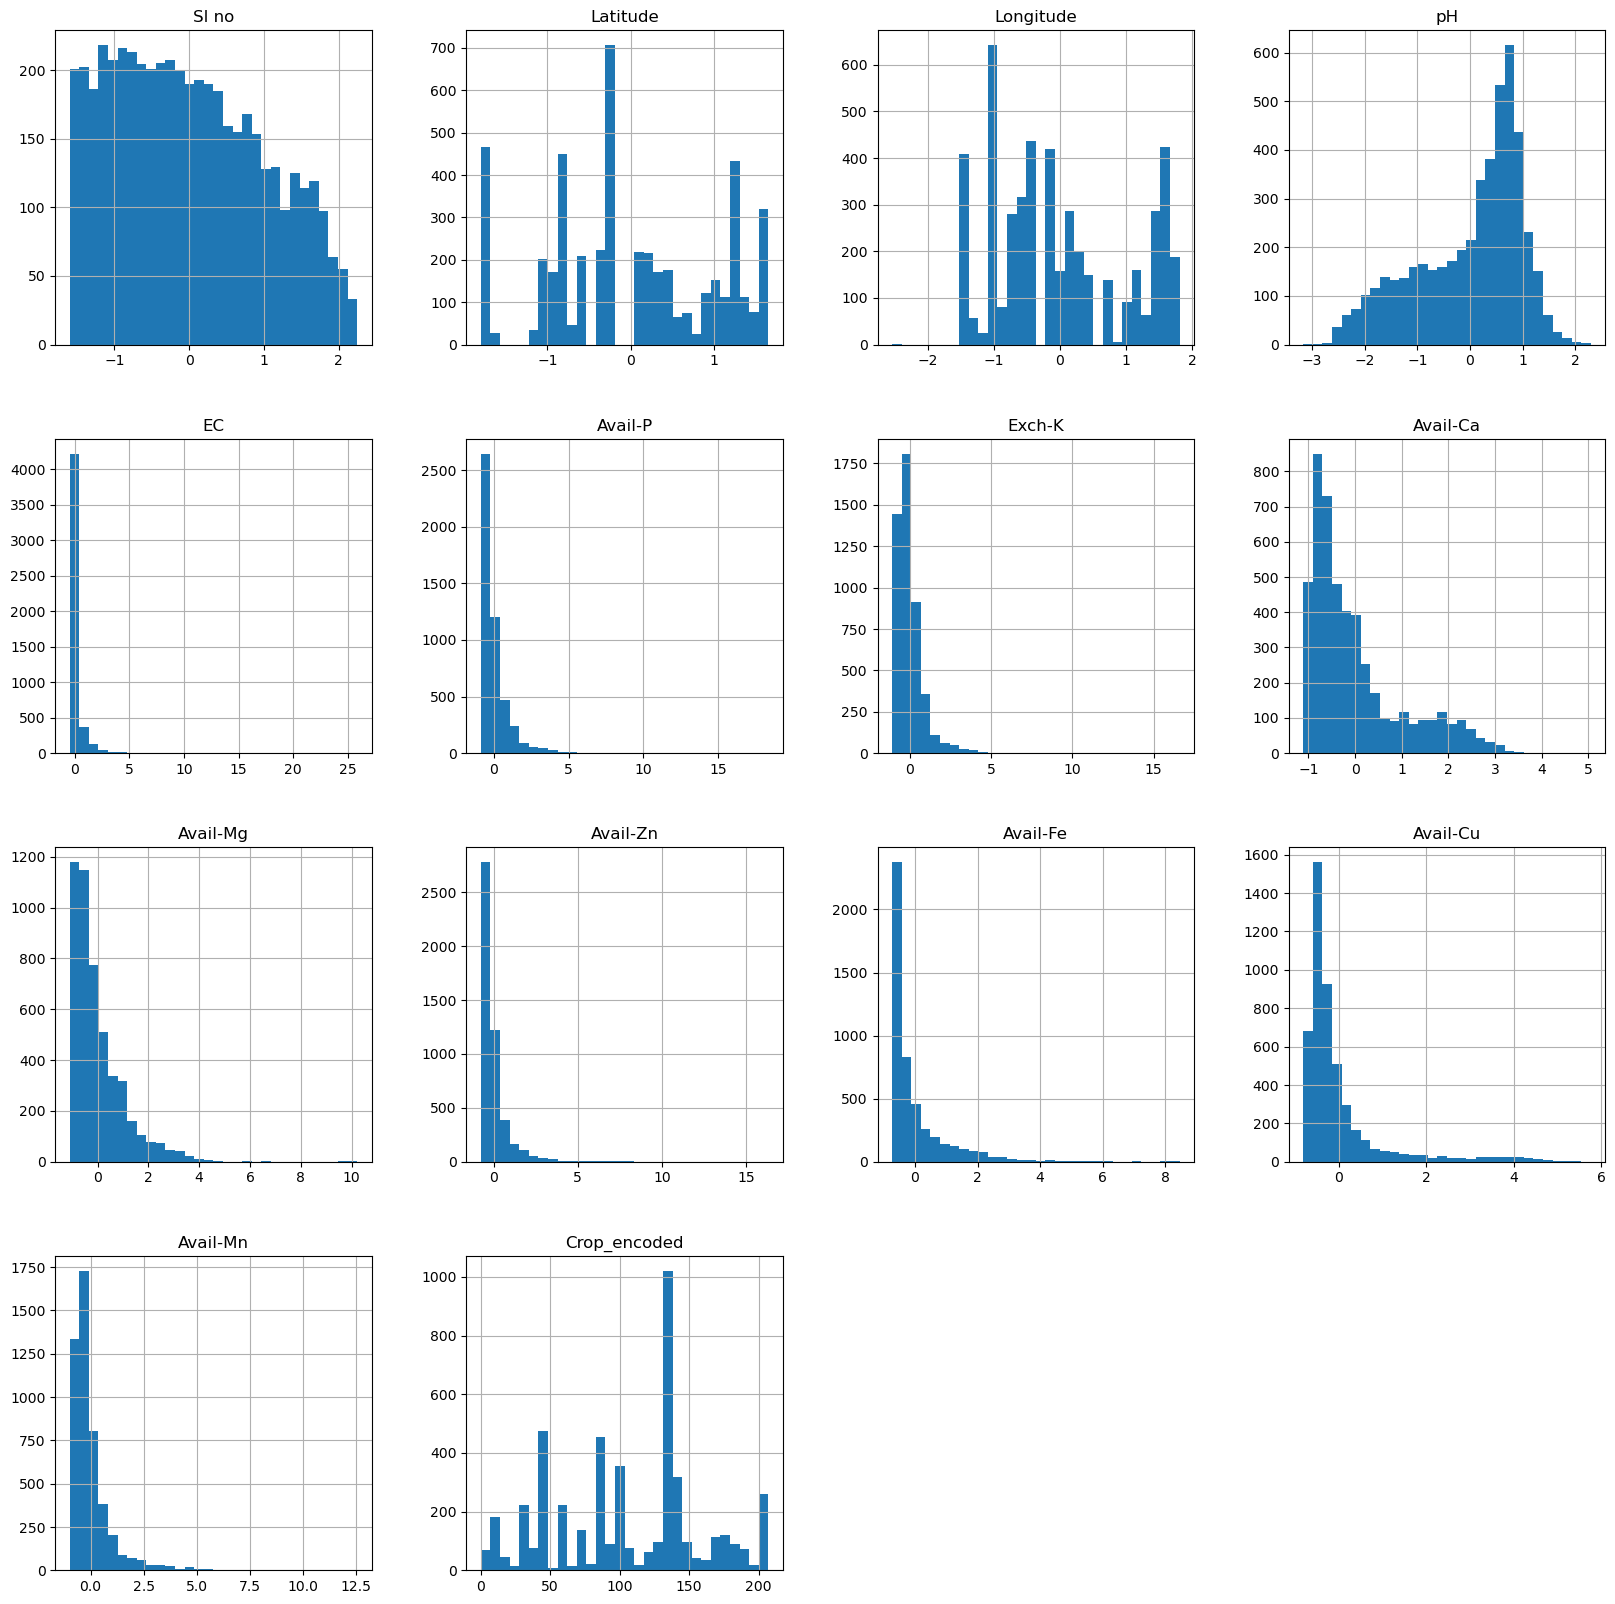

In [13]:
df_normalized.select_dtypes(exclude='O').hist(bins=30, figsize =(20,20))
plt.show()

In [14]:
#numerical: discrete vs continuous
discrete = [col for col in df_normalized.columns if df_normalized[col].dtype !='O'
            and df_normalized[col].nunique() < 10]

continuous = [col for col in df_normalized.columns if df_normalized[col].dtype !='O'
            and col not in discrete]

categorical = [col for col in df_normalized.columns if df_normalized[col].dtype =='O']

print("There are",len(discrete),"discrete variables")
print("There are",len(continuous),"continuous variables")
print("There are",len(categorical),"categorical variables")

There are 0 discrete variables
There are 14 continuous variables
There are 16 categorical variables


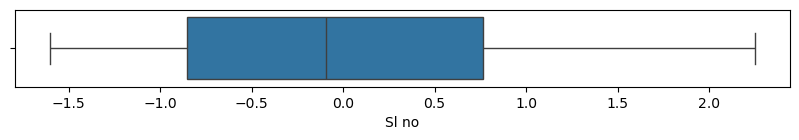

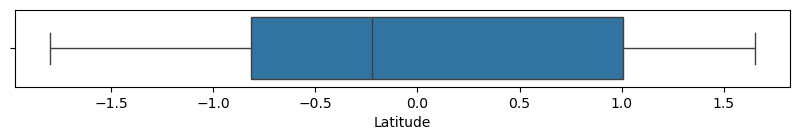

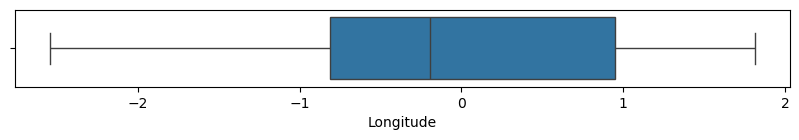

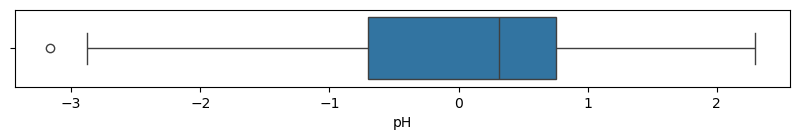

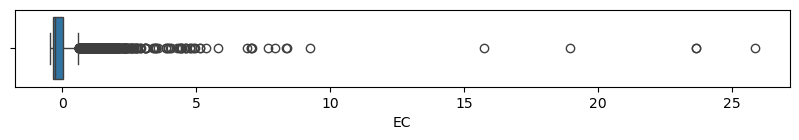

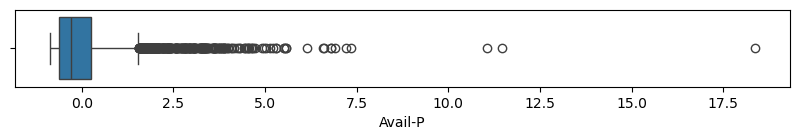

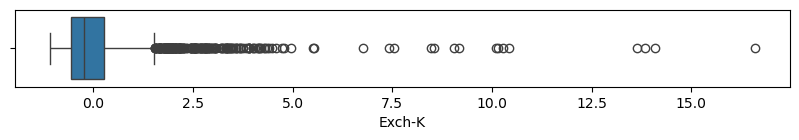

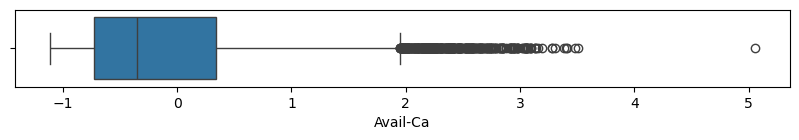

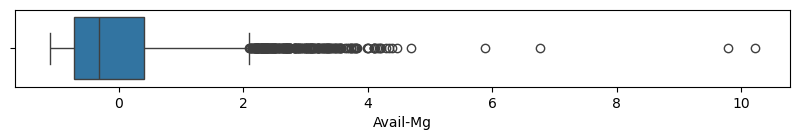

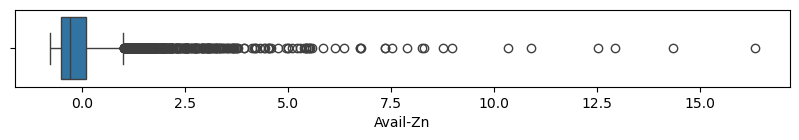

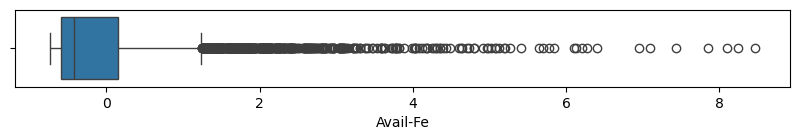

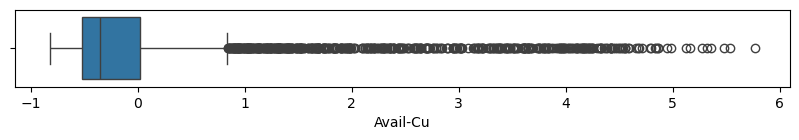

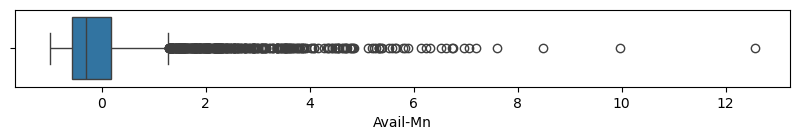

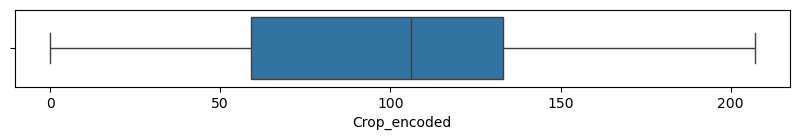

In [15]:
#Outliers detection for continuous variables
for column in df_normalized[continuous]:
        plt.figure(figsize=(10,1))
        sns.boxplot(data=df_normalized[continuous], x=column)

<Axes: >

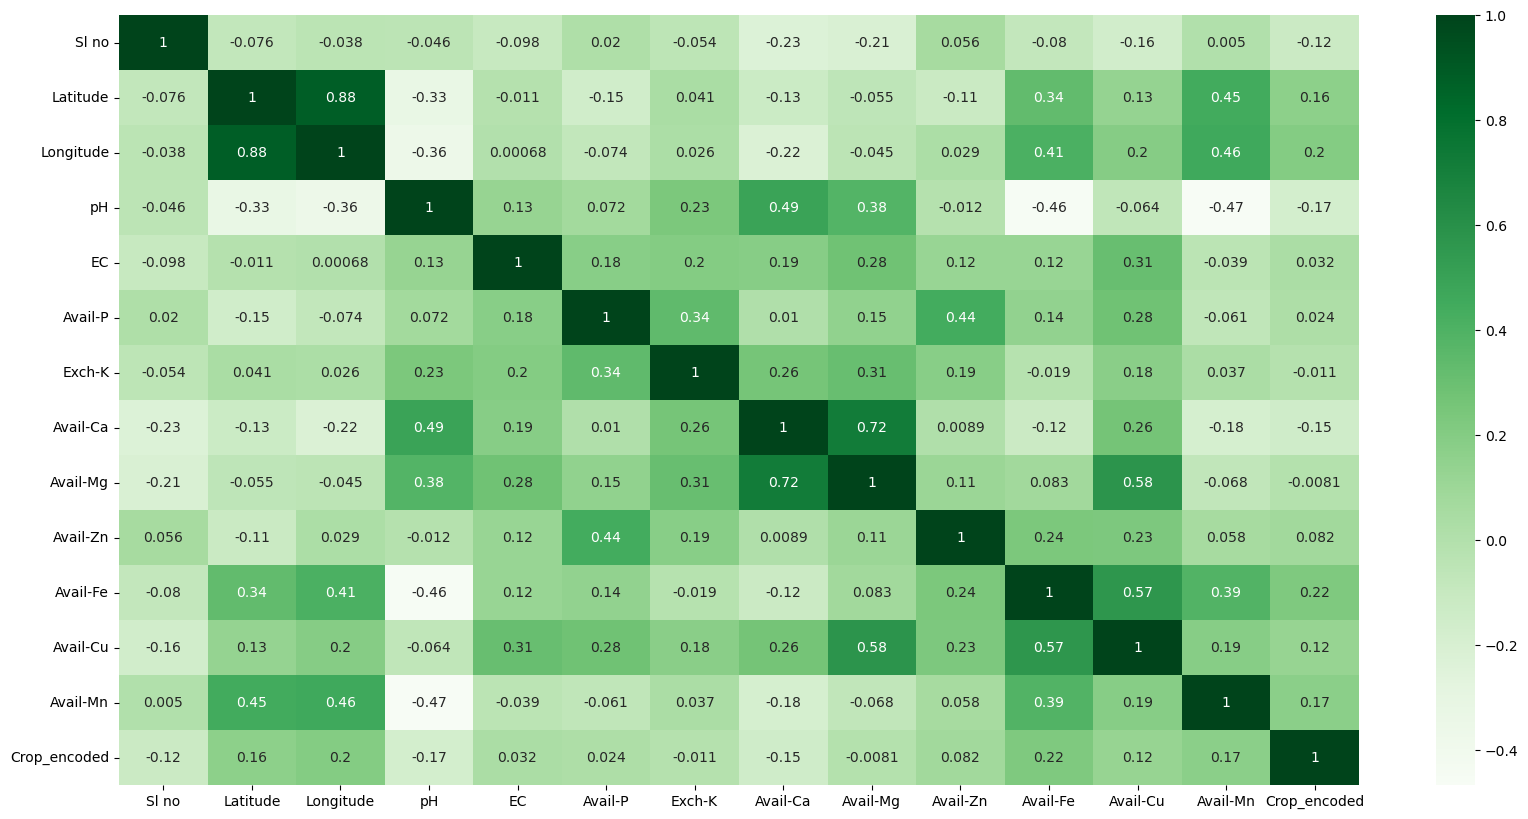

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_normalized[continuous].corr(), cmap="Greens",annot=True)